In [1]:

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

Datasets loaded by Scikit-Learn are in dict-y form:
1. A $DESCR$ key describing the dataset
2. $data$ key containing a array with one row per instance and one column per feature
3. $target$ key containing an array with labels

In [2]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

X is raw data to be learned, y is solution set to raw data

Raw data has 70,000 images with each image having 784 features
Solution set will only have 70,000 answers

In [9]:
y.shape

(70000,)

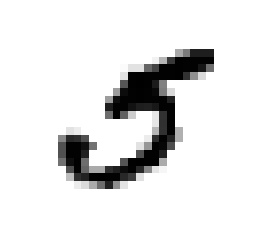

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [5]:
y[36000]

5.0

# Step 1: Create test set and set aside

already split up for us. First 60000 images for training and last 10000 for test

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Shuffle training dataset to guarantee cross-validation folds to be similar (no one set will miss digits)

In [7]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]  

# Step 2: Train a Binary Classifier

Goal: start with one letter and just train to identify number 5

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test ==5)

Pick a classifier and train it.

Use **Gradient Descent**. Can handle large datasets efficiently because it trains instances independently

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/Users/admin/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

# Step 6: Deploy it

some_digit was previously shown to be a single image of 5

In [15]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [16]:
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# Step 7: Performance Measures

## Measuring accuracy using **Cross-validation**

**Stratified sampling** is done during cross validation. At each iteration:
    1. code creates clone of classifier
    2. Trains that clone on the training folds
    3. Makes predictions on test fold
    4. Counts the number of correct predictions
    5. Outputs the ratio of correct prediction

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.94785,  0.95845,  0.9484 ])

Result is accuracy / ratio of correct prodictions on 3 folds (cv) on all cross-validation folds

**BUT LET'S EVALUATE IT FURTHER**

In [22]:
from sklearn.base import BaseEstimator

# will never classify a 5 
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.91145,  0.9102 ,  0.9073 ])

It has over 90% accuracy because only ~10% of images are 5. Therefore scoring= accuracy is not preferred when some classes are more frequent than others

## Measuring performance using Confusion Matrix

Confusion matrix. Number of times instances of class A gets confused for class B. Therefore when confused, we also look at another class that always gets confused with it

**Prerequisites**
need to have a set of predictions to be compared to actual targets. only use training set and not test set. So, use cross_val_predict() function 


In [27]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

**What happened?** like cross_val_score, **cross_val_predict()** performs K-fold cross-validation, but returns clean (prediction made by model never saw data in training) prediction for each instance in training set...instead of evaluation scores in cross_val_score

Deploy with the target classes (y_train_5) and the predicted classes (y_train_pred)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53669,   910],
       [ 1996,  3425]])

**What does the table mean?**
Row = a class (non-5, 5)
Column = predicted class (correct classification, wrong classification)

**Conclusion**
1. 53,669 correct classified as non-5s / true negatives
2. 910 wrongly classified as 5 / false positives
3. 1,996 incorrectly classified as  as 5 / false negatives
4. 3,425 correctly classified as 5s / true positives



Perfect classifier will only have true negatives and positives as such

    array( [ [53669,   0],        
           [  0,  3425]])

To have a more concise metric, one can look at accuracy of positive predictions:
    
    precision = TP / TP + FP

Need to be reinforced with **recall** or sensitivity or true positive rate because it is possible that:
        
        precision = 1/1 = 100% 
   
One positive prediction out of 1 predictions made will be 100%


**True positive rate** is ratio of positive instances that are correctly detected by the classifiers

        recall = TP (TP + FN)
    

### Deploying **Precision and recall** 

In [34]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.79008073817762403

In [35]:
recall_score(y_train_5, y_train_pred)

0.63180225050728644

**Conclusion:** It's not as good when used with recall or true positive rate

**F sub-1 score** Precision and recall in just one function.

    F sub-1 = 2 / (1/precision) + (1/recall) = TP / [ TP + (FN + FP)/2] 
    
See book for more context

### Deploy **F sub-1**

In [38]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.70213202132021313

### Precision, recall, or F1? All?

See https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9 